In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
# from natsort import natsorted
import os
import pandas as pd
from scipy.optimize import curve_fit
import scipy
from scipy import special
from matplotlib.animation import FuncAnimation
import glob
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def label(x,y,a,b,pur="all"):
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)
    if pur=="all":
        plt.rcParams['figure.figsize'] = [a,b]
    elif pur=="chi2":
        plt.title("Chi2 Analysis, S-%s, Channel %s"%(a,b), fontsize=20)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    return 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],int(y[i]),fontsize=15)
def gaus_fit(ri,rf,fx,fy,nm="norm"):
    from scipy.optimize import curve_fit
    def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    from scipy.stats import chisquare
    b=len(bins)-1
    hist_PI=[]
    for j in range(b):
        if ri<=bins[j]<=rf:                                                          #Bins range for gauss fit
            hist_PI.extend([j])
    x=bins[hist_PI]+(bins[1]-bins[0])/2
    y=n[hist_PI]
    l = len(x)
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))#the number of data
    popt,pcov = curve_fit(gaus,x,y, p0=[max(y), mean, sigma])
    m=x[1]-x[0]
    X=np.arange(x.min(),x.max(),m/10)
#     chi2=chisquare(n[hist_PI],f_exp=gaus(x,*popt))
#     b=chi2[0]/(len(hist_PI)-3)
    if nm=="norm":
        textstr = '\n'.join((
        r'$\mu=%.2f \pm %.2f$ ADC' % (popt[1], np.sqrt(pcov[1,1])),
        r'$\sigma=%.2f \pm %.2f$ ADC' % (popt[2], np.sqrt(pcov[2,2]))
        ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
    elif nm=="keV":
        textstr = '\n'.join((
            r'$\mu=%.2f \pm %.2f$ keV' % (popt[1], np.sqrt(pcov[1,1])),
            r'$\sigma=%.2f \pm %.2f$ keV' % (popt[2], np.sqrt(pcov[2,2]))
            )) 
        

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(fx, fy, textstr, fontsize=12,
             verticalalignment='top', bbox=props)
#     return popt[0], popt[1],popt[2]
    return popt[0], popt[1],popt[2],plt.plot(X,gaus(X,*popt),'r')

In [3]:
a = [1,2]
b = [5,4]
c = []
c.extend(a)
c.extend(b)
c

[1, 2, 5, 4]

# Rectangular Crystal

In [69]:
SS_Inner_old = []
SS_Innermost_old = []
Full_Inner_old = []
Full_Innermost_old = []

for i in range(2, 7):
    f = open('Rectangular_Lead4in/Output_%d/Result_Final_%d.pickle'%(i,i), 'rb')
    dat = pickle.load(f)
    SS_inner = dat['Axion_Spectrum_inner9']
    Full_inner = dat['Full_Spectrum_inner9']
    SS_24 = dat['Axion_Spectrum_innermost']
    Full_24 = dat['Full_Spectrum_innermost']
    SS_Inner_old.extend(SS_inner)
    SS_Innermost_old.extend(SS_24)
    Full_Inner_old.extend(Full_inner)
    Full_Innermost_old.extend(Full_24)
    f.close()

In [87]:
a=2

In [75]:
new_list_old = [x for x in Full_Inner_old if x != 0]
new_list2_old = [x for x in Full_Innermost_old if x != 0]

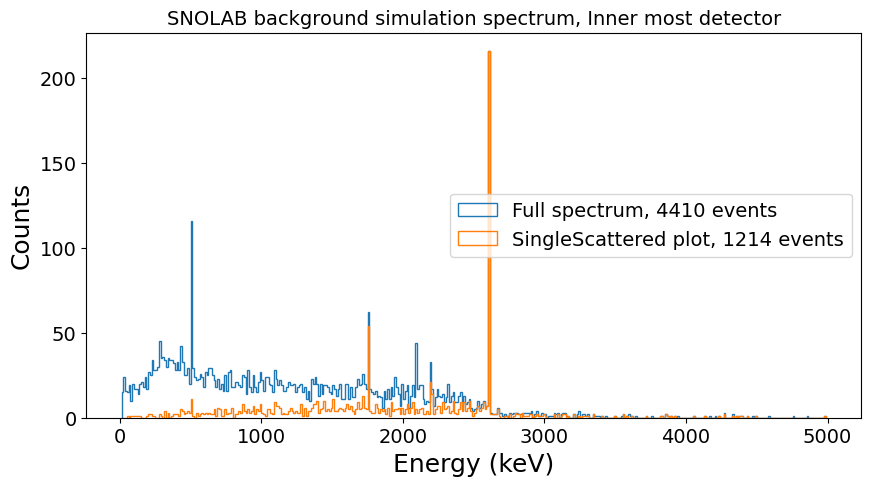

In [155]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_rct_1, bins, patches = plt.hist(Full_Innermost_old, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list2_old))
n_rct_1SS, bins, patche = plt.hist(SS_Innermost_old, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Innermost_old))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner most detector", fontsize = 14)
plt.savefig("Rectangular_Lead4in/Energy_CsI_snolabbkg_innermost.jpg")


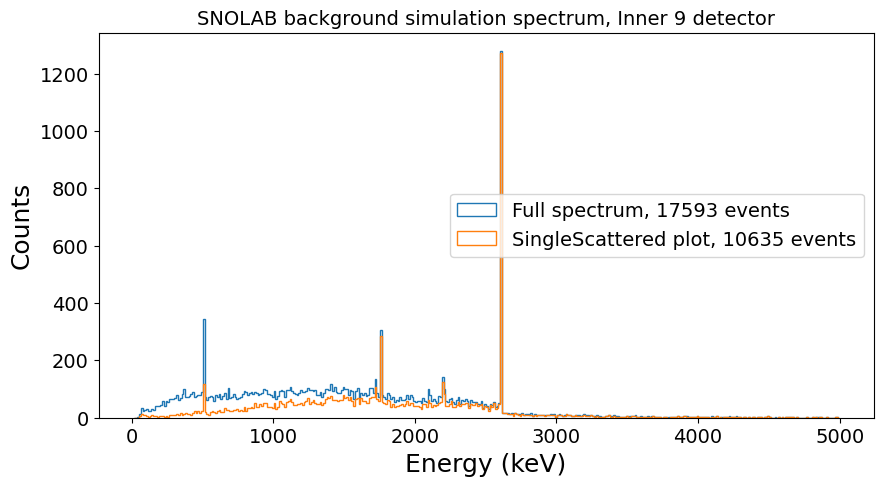

In [156]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_rct_9, bins, patches = plt.hist(Full_Inner_old, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list_old))
n_rct_9SS, bins, patche = plt.hist(SS_Inner_old, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Inner_old))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner 9 detector", fontsize = 14)
plt.savefig("Trapezoid_Lead4in/Energy_CsI_snolabbkg_inner.jpg")


# Trapezoid Crystal

In [129]:
SS_Inner = []
SS_Innermost = []
Full_Inner = []
Full_Innermost = []

for i in range(3,8):
    f = open('Trapezoid_Lead4in/Output_%d/Result_Final_%d.pickle'%(i,i), 'rb')
    dat = pickle.load(f)
    SS_inner = dat['Axion_Spectrum_inner9']
    Full_inner = dat['Full_Spectrum_inner9']
    SS_24 = dat['Axion_Spectrum_innermost']
    Full_24 = dat['Full_Spectrum_innermost']
    SS_Inner.extend(SS_inner)
    SS_Innermost.extend(SS_24)
    Full_Inner.extend(Full_inner)
    Full_Innermost.extend(Full_24)
    f.close()

In [25]:
SS_inner = dat['Axion_Spectrum_inner9']
Full_inner = dat['Full_Spectrum_inner9']

In [5]:
SS_24 = dat['Axion_Spectrum_innermost']
Full_24 = dat['Full_Spectrum_innermost']

In [131]:
new_list = [x for x in Full_Inner if x != 0]
new_list2 = [x for x in Full_Innermost if x != 0]

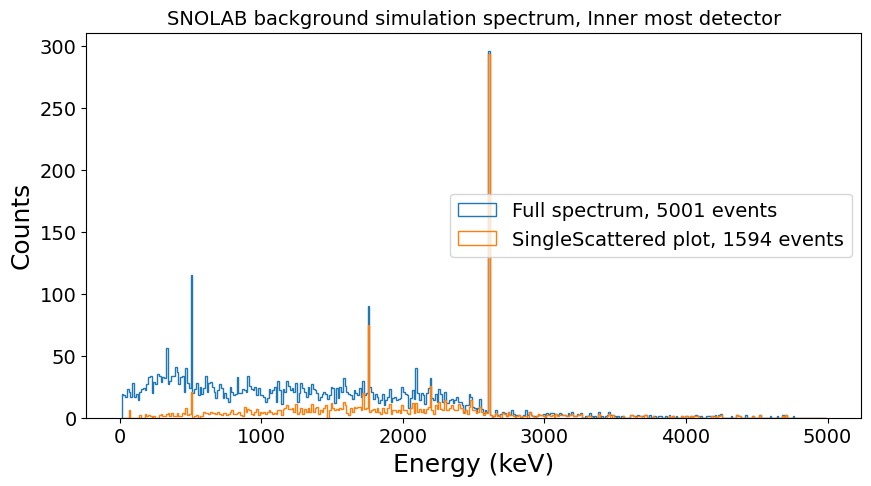

In [157]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_trp_1, bins, patches = plt.hist(Full_Innermost, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list2))
n_trp_1SS, bins, patche = plt.hist(SS_Innermost, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Innermost))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner most detector", fontsize = 14)
plt.savefig("Trapezoid_Lead4in/Energy_CsI_snolabbkg_innermost.jpg")


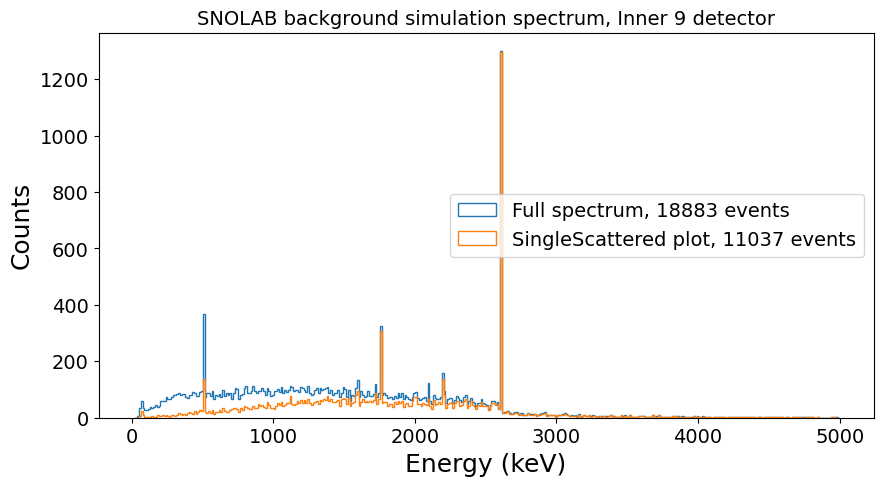

In [158]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_trp_9, bins, patches = plt.hist(Full_Inner, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list))
n_trp_9SS, bins, patche = plt.hist(SS_Inner, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Inner))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner 9 detector", fontsize = 14)
plt.savefig("Trapezoid_Lead4in/Energy_CsI_snolabbkg_inner.jpg")


In [112]:
bins[158], bins[398]

(1990.0, 4990.0)

In [114]:
n_trp_9[158:398].sum(), n_rct_9[158:398].sum()

(5490.0, 5090.0)

# Trapezoid No Lead

In [4]:
SS_Inner_noLead = []
SS_Innermost_noLead = []
Full_Inner_noLead = []
Full_Innermost_noLead = []

for i in range(1, 6):
    f = open('Trapezoid_Lead4in/NoLead/Output_%d/Result_Final_%d.pickle'%(i,i), 'rb')
    dat = pickle.load(f)
    SS_inner = dat['Axion_Spectrum_inner9']
    Full_inner = dat['Full_Spectrum_inner9']
    SS_24 = dat['Axion_Spectrum_innermost']
    Full_24 = dat['Full_Spectrum_innermost']
    SS_Inner_noLead.extend(SS_inner)
    SS_Innermost_noLead.extend(SS_24)
    Full_Inner_noLead.extend(Full_inner)
    Full_Innermost_noLead.extend(Full_24)
    f.close()

In [7]:
new_list_noLead = [x for x in Full_Inner_noLead if x != 0]
new_list2_noLead = [x for x in Full_Innermost_noLead if x != 0]

Text(0.5, 1.0, 'SNOLAB background simulation spectrum, Inner most detector, no Lead')

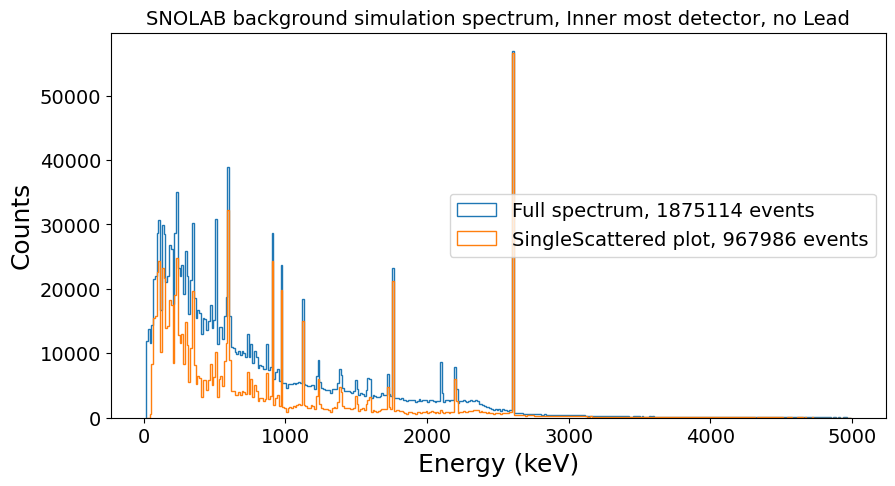

In [8]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_trp_1_noLead, bins, patches = plt.hist(Full_Innermost_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list2_noLead))
n_trp_1SS_noLead, bins, patche = plt.hist(SS_Innermost_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Innermost_noLead))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner most detector, no Lead", fontsize = 14)
# plt.savefig("Trapezoid_Lead4in/NoLead/Energy_CsI_snolabbkg_innermost.jpg")


Text(0.5, 1.0, 'SNOLAB background simulation spectrum, Inner 9 detector')

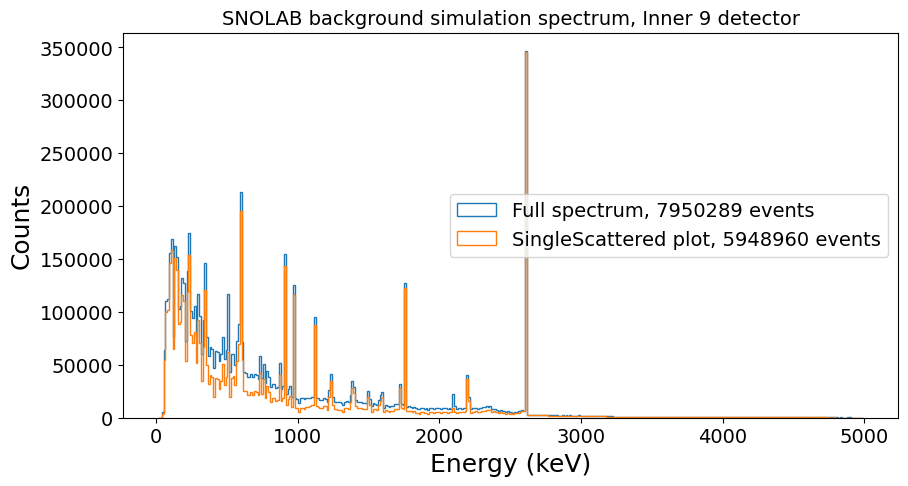

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_trp_9_noLead, bins, patches = plt.hist(Full_Inner_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list_noLead))
n_trp_9SS_noLead, bins, patche = plt.hist(SS_Inner_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Inner_noLead))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner 9 detector", fontsize = 14)
# plt.savefig("Trapezoid_Lead4in/NoLead/Energy_CsI_snolabbkg_inner.jpg")


In [194]:
n_trp_1_noLead_dru = n_trp_1_noLead*dru_factor_trp
n_trp_1SS_noLead_dru = n_trp_1SS_noLead*dru_factor_trp

n_trp_9_noLead_dru = n_trp_9_noLead*dru_factor_trp/9
n_trp_9SS_noLead_dru = n_trp_9SS_noLead*dru_factor_trp/9


In [10]:
SS_Inner_rct_noLead = []
SS_Innermost_rct_noLead = []
Full_Inner_rct_noLead = []
Full_Innermost_rct_noLead = []

for i in range(1, 6):
    f = open('Rectangular_Lead4in/NoLead/Output_%d/Result_Final_%d.pickle'%(i,i), 'rb')
    dat = pickle.load(f)
    SS_inner = dat['Axion_Spectrum_inner9']
    Full_inner = dat['Full_Spectrum_inner9']
    SS_24 = dat['Axion_Spectrum_innermost']
    Full_24 = dat['Full_Spectrum_innermost']
    SS_Inner_rct_noLead.extend(SS_inner)
    SS_Innermost_rct_noLead.extend(SS_24)
    Full_Inner_rct_noLead.extend(Full_inner)
    Full_Innermost_rct_noLead.extend(Full_24)
    f.close()

In [11]:
new_list_rct_noLead = [x for x in Full_Inner_rct_noLead if x != 0]
new_list2_rct_noLead = [x for x in Full_Innermost_rct_noLead if x != 0]

Text(0.5, 1.0, 'Simulation, Rectangular, Inner most detector, no Lead')

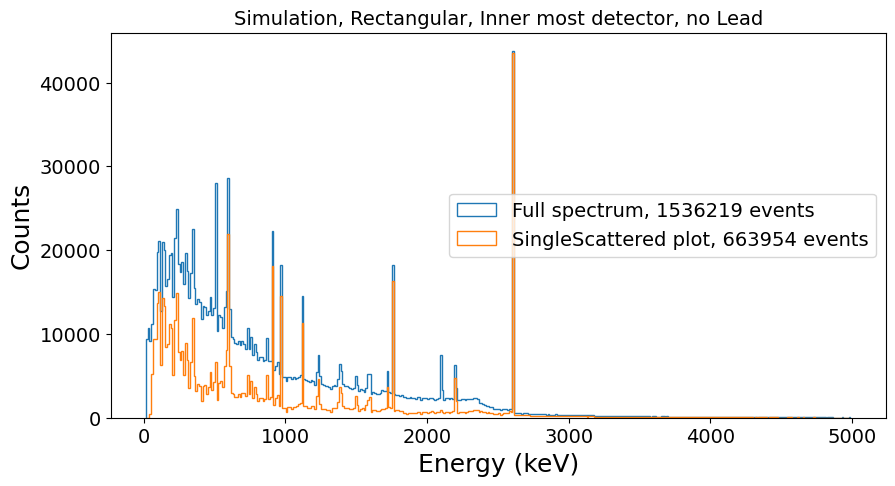

In [21]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5

n_rct_1_noLead, bins, patches = plt.hist(Full_Innermost_rct_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list2_rct_noLead))
n_rct_1SS_noLead, bins, patche = plt.hist(SS_Innermost_rct_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Innermost_rct_noLead))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("Simulation, Rectangular, Inner most detector, no Lead", fontsize = 14)
# plt.savefig("Trapezoid_Lead4in/NoLead/Energy_CsI_snolabbkg_innermost.jpg")


Text(0.5, 1.0, 'Simulation, Rectangular, Inner 9 detector, no Lead')

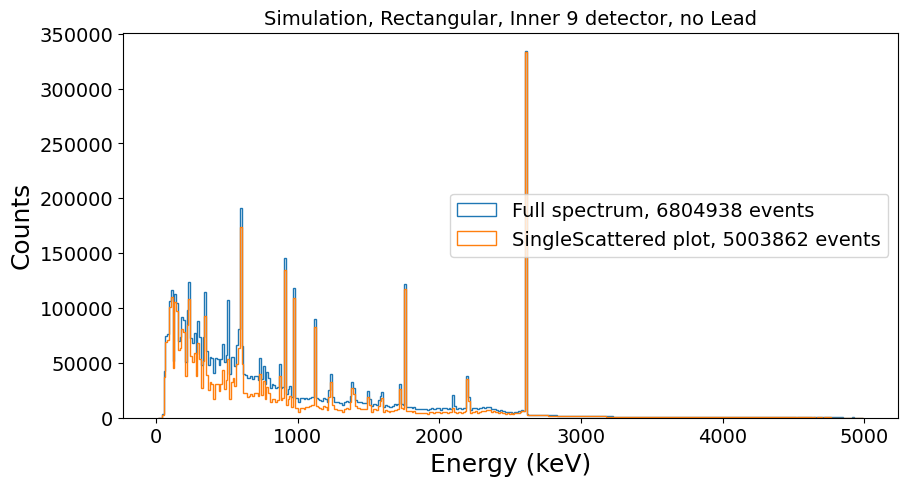

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
n_rct_9_noLead, bins, patches = plt.hist(Full_Inner_rct_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "Full spectrum, %d events"% len(new_list_rct_noLead))
n_rct_9SS_noLead, bins, patche = plt.hist(SS_Inner_rct_noLead, bins = np.arange(15, 5000, bw), histtype = "step", label = "SingleScattered plot, %d events"%len(SS_Inner_rct_noLead))
#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("Simulation, Inner 9 detector, no Lead", fontsize = 14)
# plt.savefig("Trapezoid_Lead4in/NoLead/Energy_CsI_snolabbkg_inner.jpg")


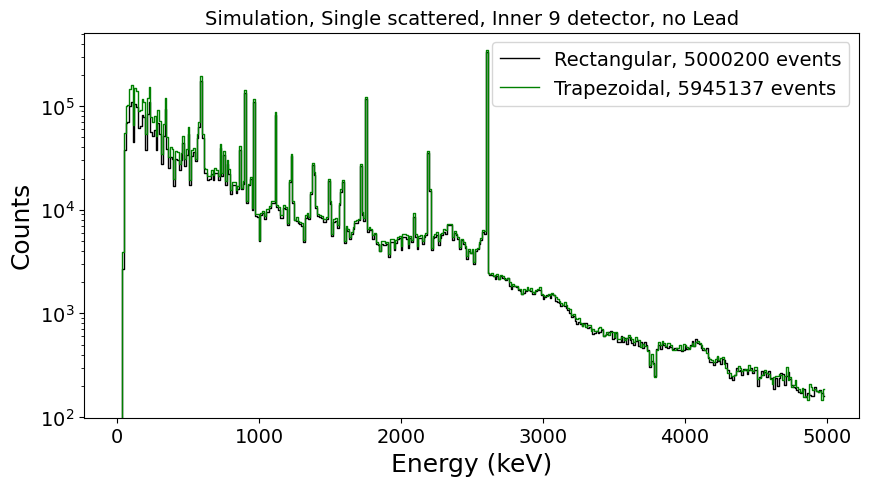

In [28]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_rct_9SS_noLead, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%n_rct_9SS_noLead.sum())

plt.step(bins[:-1], n_trp_9SS_noLead, 'g',where="mid",linewidth=1,label="Trapezoidal, %d events"%n_trp_9SS_noLead.sum())
plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("Simulation, Single scattered, Inner 9 detector, no Lead", fontsize = 14)
plt.savefig("Figure/Energy_CsI_sim_Nolead_inner9_comp.jpg")


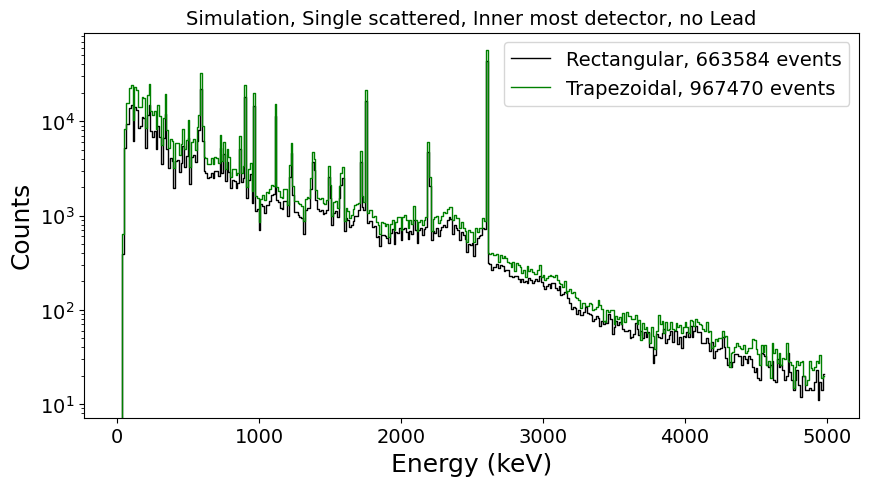

In [27]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_rct_1SS_noLead, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%n_rct_1SS_noLead.sum())
plt.step(bins[:-1], n_trp_1SS_noLead, 'g',where="mid",linewidth=1,label="Trapezoidal, %d events"%n_trp_1SS_noLead.sum())
plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts", 10, 5)
plt.title("Simulation, Single scattered, Inner most detector, no Lead", fontsize = 14)
plt.savefig("Figure/Energy_CsI_sim_Nolead_innermost_comp.jpg")


In [22]:
dru_factor = 40.87361991073495/12.5

In [23]:
dru_factor_rct = dru_factor/3.55
dru_factor_trp = dru_factor/4.66

In [24]:
n_trp_1_noLead_dru = n_trp_1_noLead*dru_factor_trp
n_trp_1SS_noLead_dru = n_trp_1SS_noLead*dru_factor_trp

n_trp_9_noLead_dru = n_trp_9_noLead*dru_factor_trp/9
n_trp_9SS_noLead_dru = n_trp_9SS_noLead*dru_factor_trp/9


n_rct_1_noLead_dru = n_rct_1_noLead*dru_factor_rct
n_rct_1SS_noLead_dru = n_rct_1SS_noLead*dru_factor_rct


n_rct_9_noLead_dru = n_rct_9_noLead*dru_factor_rct/9
n_rct_9SS_noLead_dru = n_rct_9SS_noLead*dru_factor_rct/9


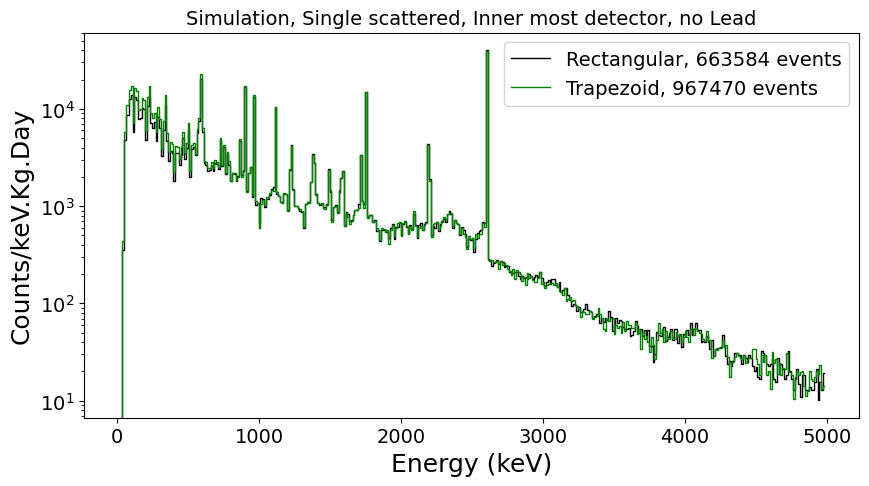

In [25]:
plt.step(bins[:-1], n_rct_1SS_noLead_dru, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%n_rct_1SS_noLead.sum())
plt.step(bins[:-1], n_trp_1SS_noLead_dru, 'g',where="mid",linewidth=1,label="Trapezoid, %d events"%n_trp_1SS_noLead.sum())



plt.yscale("log")

plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("Simulation, Single scattered, Inner most detector, no Lead", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_innermost_nolead_dru_comparison.jpg")

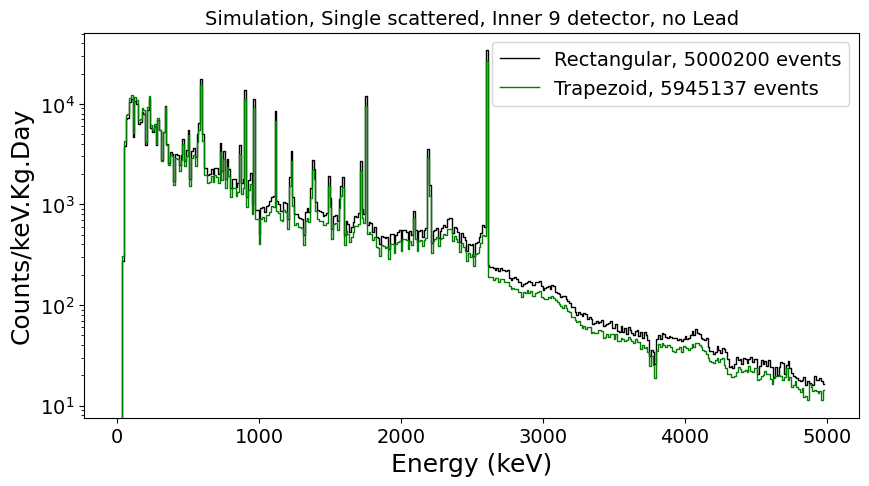

In [26]:
plt.step(bins[:-1], n_rct_9SS_noLead_dru, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%n_rct_9SS_noLead.sum())
plt.step(bins[:-1], n_trp_9SS_noLead_dru, 'g',where="mid",linewidth=1,label="Trapezoid, %d events"%n_trp_9SS_noLead.sum())



plt.yscale("log")

plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("Simulation, Single scattered, Inner 9 detector, no Lead", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_inner9_nolead_dru_comparison.jpg")

# Data

In [29]:
f = open('../Output_Run_bkg1.pickle', 'rb')
dat = pickle.load(f)
f.close()

In [32]:
dat.keys()

dict_keys(['Date', 'Time', 'n_energy_channel', 'bin_widthkeV', 'bin_end', 'count_mult', 'n_energy_channelSS', 'n_EnergyInnermost', 'n_EnergyInnermostSS', 'n_EnergyInner', 'n_EnergyInnerSS', 'n_EnergyAll', 'bins_combined', 'count1det_ch'])

In [33]:
n_EnergyInnermost = dat['n_EnergyInnermost']
n_EnergyInnermostSS = dat['n_EnergyInnermostSS']
n_EnergyInner = dat['n_EnergyInner']
n_EnergyInnerSS = dat['n_EnergyInnerSS']
Time = dat['Time']


In [42]:
bin_widthkeV = dat['bin_widthkeV']
bin_end = dat['bin_end']
bins_combined = dat['bins_combined']

In [44]:
len(bins_combined)

3291

In [47]:
len(n_EnergyInnermostSS), len(n_EnergyInnermost), len(n_EnergyInner), len(n_EnergyInnerSS)

(264, 264, 3290, 3290)

In [48]:
max(n_EnergyInnermost)

1063473.0

In [50]:
bin_widthkeV = 100

In [51]:
bins = np.arange(0, 26400, bin_widthkeV)
len(bins)

264

In [ ]:
bins_combined

Text(0.5, 1.0, 'Inner mostcombined Spectrum  ')

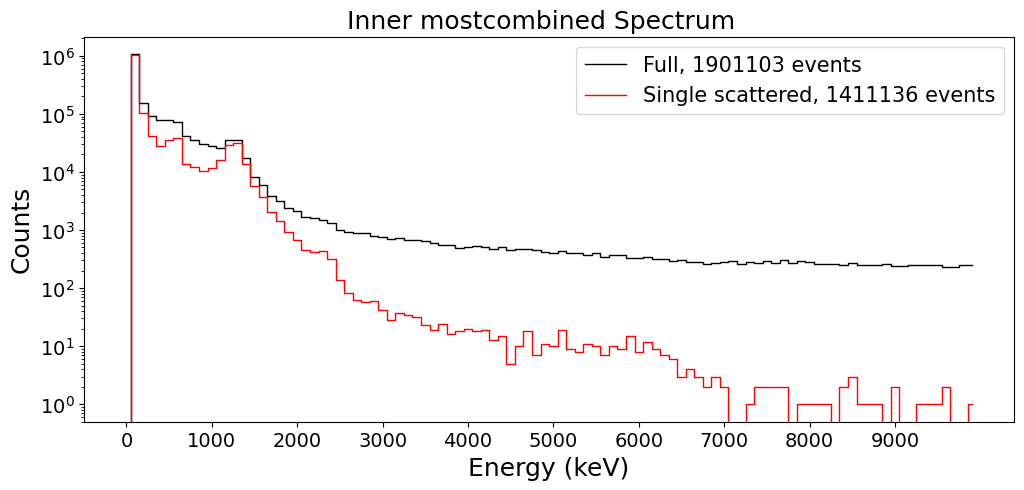

In [68]:
j=100
plt.step(bins_combined[0:j], n_EnergyInnermost[0:j], 'k',where="mid",linewidth=1,label="Full, %d events"%n_EnergyInnermost.sum())
plt.step(bins_combined[0:j], n_EnergyInnermostSS[0:j], 'r',where="mid",linewidth=1,label="Single scattered, %d events"%n_EnergyInnermostSS.sum())
plt.yscale("log")
plt.legend(fontsize=15)
plt.xticks(np.arange(0, 10000, 1000))
label("Energy (keV)", "Counts", 12, 5)
plt.title("Inner mostcombined Spectrum  ", fontsize=18)

Text(0.5, 1.0, 'Inner 10 combined Spectrum  ')

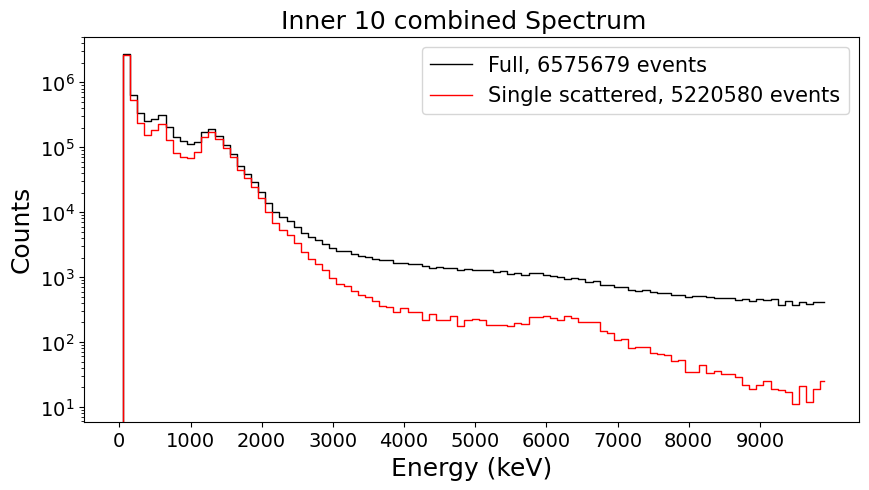

In [80]:
plt.step(bins_combined[0:100], n_EnergyInner[0:100], 'k',where="mid",linewidth=1,label="Full, %d events"%n_EnergyInner.sum())
plt.step(bins_combined[0:100], n_EnergyInnerSS[0:100], 'r',where="mid",linewidth=1,label="Single scattered, %d events"%n_EnergyInnerSS.sum())
plt.yscale("log")
plt.legend(fontsize=15)
plt.xticks(np.arange(0, 10000, 1000))
label("Energy (keV)", "Counts", 12, 5)
plt.title("Inner 10 combined Spectrum  ", fontsize=18)

In [167]:
dru_factor_data = 1/(100*3.55*9*Time/(3600*24))

In [170]:
n_EnergyInner_dru = n_EnergyInner*dru_factor_data
n_EnergyInnerSS_dru = n_EnergyInnerSS*dru_factor_data

Text(0.5, 1.0, 'Inner 10 combined Spectrum  ')

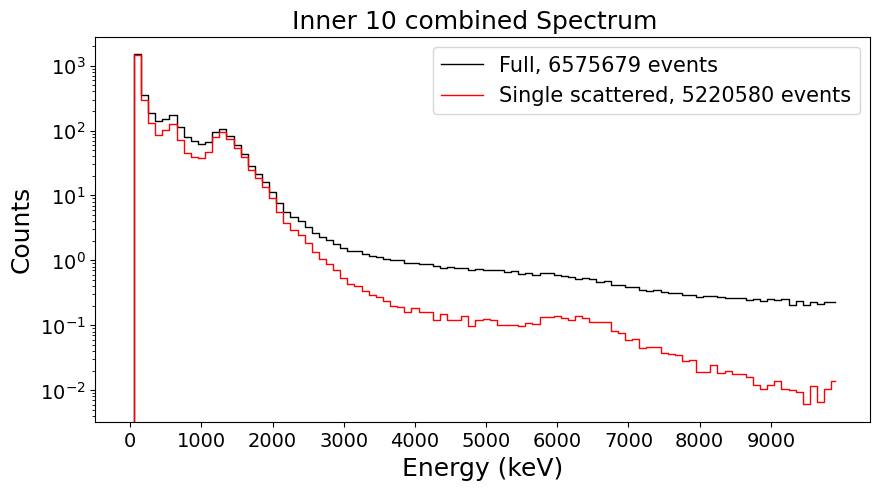

In [169]:
plt.step(bins_combined[0:100], n_EnergyInner[0:100]*dru_factor_data, 'k',where="mid",linewidth=1,label="Full, %d events"%n_EnergyInner.sum())
plt.step(bins_combined[0:100], n_EnergyInnerSS[0:100]*dru_factor_data, 'r',where="mid",linewidth=1,label="Single scattered, %d events"%n_EnergyInnerSS.sum())
plt.yscale("log")
plt.legend(fontsize=15)
plt.xticks(np.arange(0, 10000, 1000))
label("Energy (keV)", "Counts", 12, 5)
plt.title("Inner 10 combined Spectrum  ", fontsize=18)

In [ ]:
dru_factor = 40.87361991073495/12.5

In [166]:
Time

48967.0

In [85]:
Time/3600

13.601944444444445

In [82]:
bins_combined[20]

2000.0

In [115]:
data_rate = n_EnergyInner[20:50].sum()/Time

In [186]:
(n_rct_9[158:398].sum()/data_rate)/60

35.230547310095275

In [117]:
3600*24/(n_trp_9[158:398].sum()/data_rate), 3600*24/(n_rct_9[158:398].sum()/data_rate)

(37.89557838718414, 40.87361991073495)

In [159]:
dru_factor = 3600*24/(n_rct_9[158:398].sum()/data_rate)/12.5

In [160]:
dru_factor_rct = dru_factor/3.55
dru_factor_trp = dru_factor/4.66

In [119]:
3600*24/(n_rct_9[158:398].sum()/data_rate)

40.87361991073495

# DRU Simulation

In [174]:
n_trp_1_dru = n_trp_1*dru_factor_trp
n_trp_1SS_dru = n_trp_1SS*dru_factor_trp

n_trp_9_dru = n_trp_9*dru_factor_trp/9
n_trp_9SS_dru = n_trp_9SS*dru_factor_trp/9


n_rct_1_dru = n_rct_1*dru_factor_rct
n_rct_1SS_dru = n_rct_1SS*dru_factor_rct


n_rct_9_dru = n_rct_9*dru_factor_rct/9
n_rct_9SS_dru = n_rct_9SS*dru_factor_rct/9


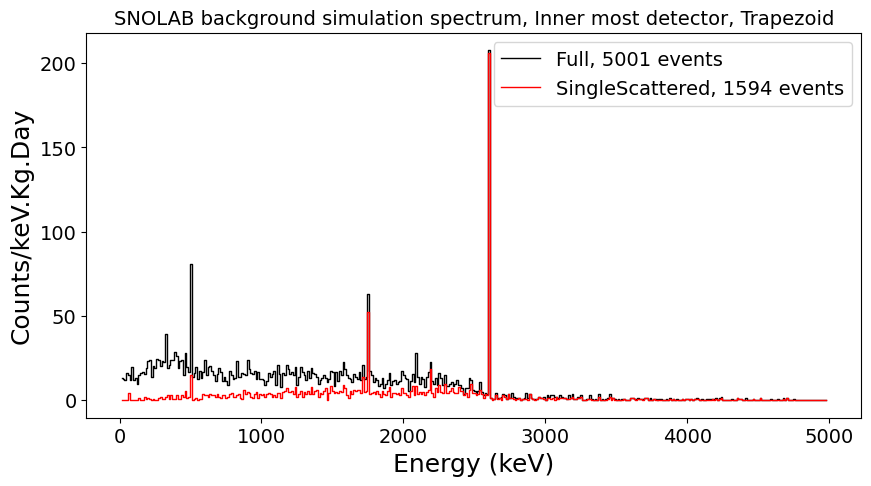

In [162]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_trp_1_dru, 'k',where="mid",linewidth=1,label="Full, %d events"%len(new_list2))
plt.step(bins[:-1], n_trp_1SS_dru, 'r',where="mid",linewidth=1,label="SingleScattered, %d events"%len(SS_Innermost))


#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner most detector, Trapezoid", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_innermost_trp.jpg")


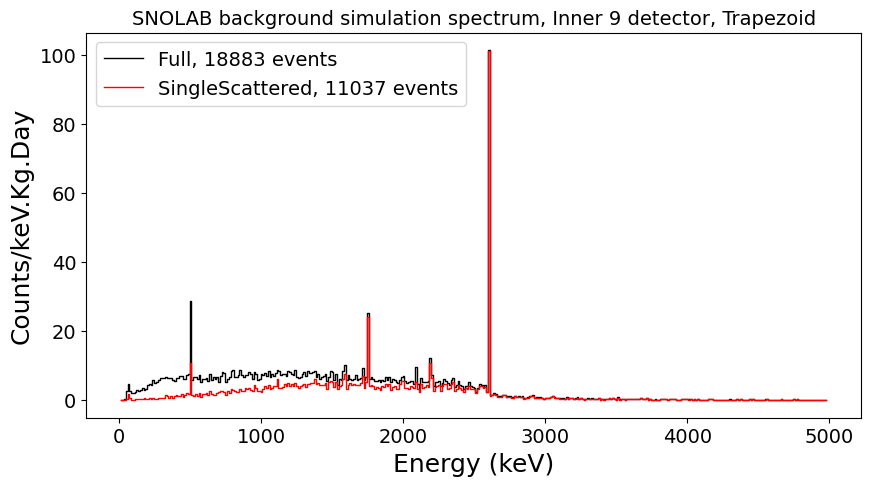

In [171]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_trp_9_dru, 'k',where="mid",linewidth=1,label="Full, %d events"%len(new_list))
plt.step(bins[:-1], n_trp_9SS_dru, 'r',where="mid",linewidth=1,label="SingleScattered, %d events"%len(SS_Inner))


#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner 9 detector, Trapezoid", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_inner9_trp.jpg")


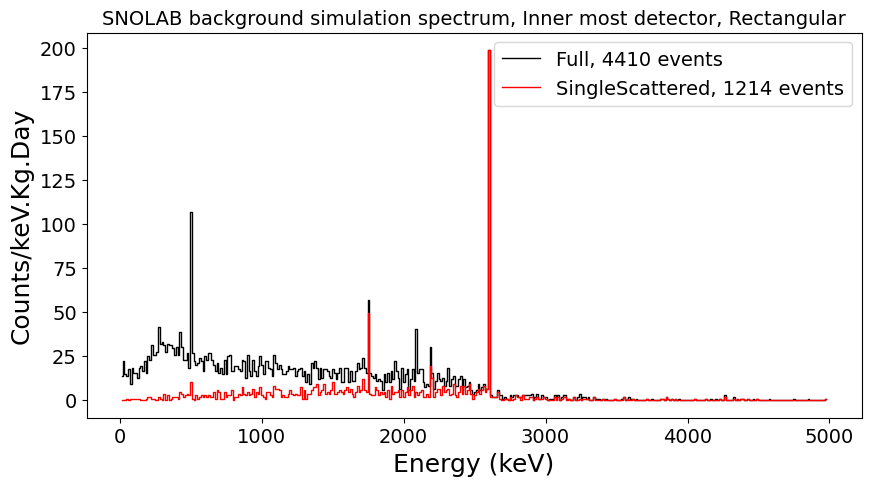

In [172]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_rct_1_dru, 'k',where="mid",linewidth=1,label="Full, %d events"%len(new_list2_old))
plt.step(bins[:-1], n_rct_1SS_dru, 'r',where="mid",linewidth=1,label="SingleScattered, %d events"%len(SS_Innermost_old))


#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner most detector, Rectangular", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_innermost_rct.jpg")


In [149]:
n_rct_9_dru.sum()

2024.107712762593

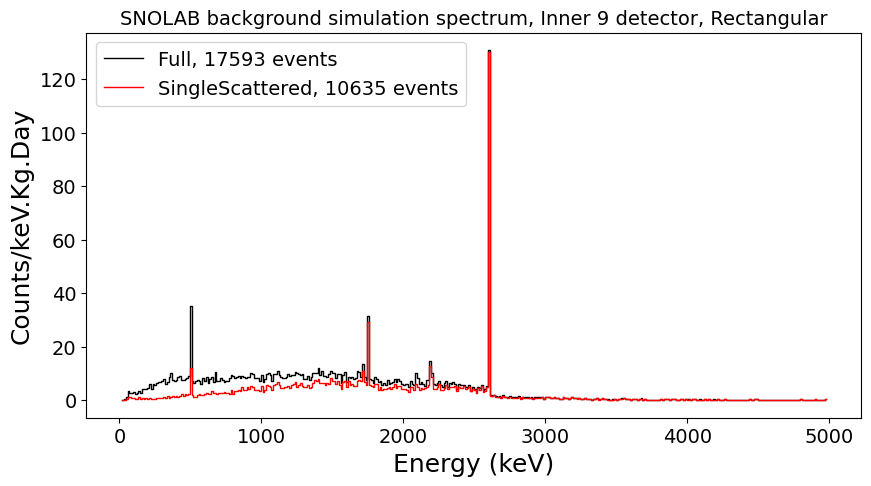

In [173]:
plt.rcParams['figure.figsize'] = [10, 5]
bw = 12.5
plt.step(bins[:-1], n_rct_9_dru, 'k',where="mid",linewidth=1,label="Full, %d events"%len(new_list_old))
plt.step(bins[:-1], n_rct_9SS_dru, 'r',where="mid",linewidth=1,label="SingleScattered, %d events"%len(SS_Inner_old))


#plt.yscale("log")
plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background simulation spectrum, Inner 9 detector, Rectangular", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_inner9_rct.jpg")


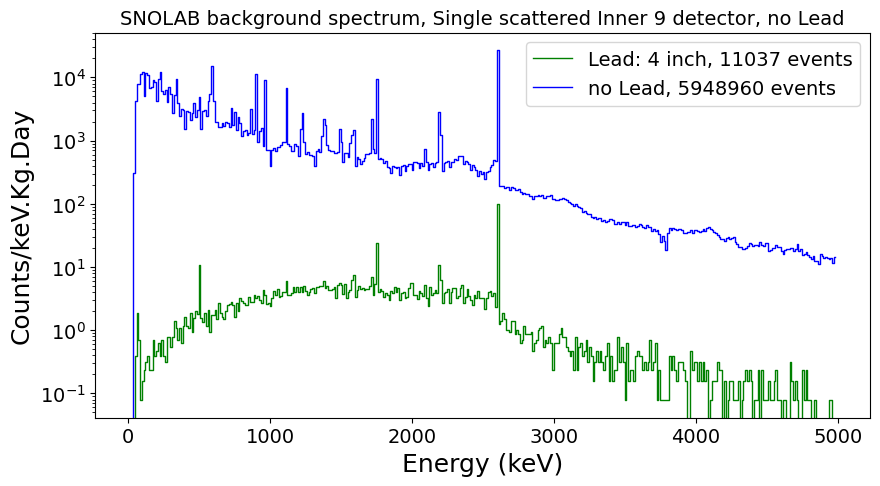

In [199]:
# plt.step(bins[:-1], n_rct_9SS_dru, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%len(SS_Inner_old))
plt.step(bins[:-1], n_trp_9SS_dru, 'g',where="mid",linewidth=1,label="Lead: 4 inch, %d events"%len(SS_Inner))
plt.step(bins[:-1], n_trp_9SS_noLead_dru, 'b',where="mid",linewidth=1,label="no Lead, %d events"%len(SS_Inner_noLead))

# plt.step(bins_combined[0:50], n_EnergyInnerSS_dru[0:50], 'r',where="mid",linewidth=1,label=" Data - rectangular, %d events"%n_EnergyInnerSS.sum())
plt.yscale("log")

plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background spectrum, Single scattered Inner 9 detector, no Lead", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_inner9_comparison-2.jpg")

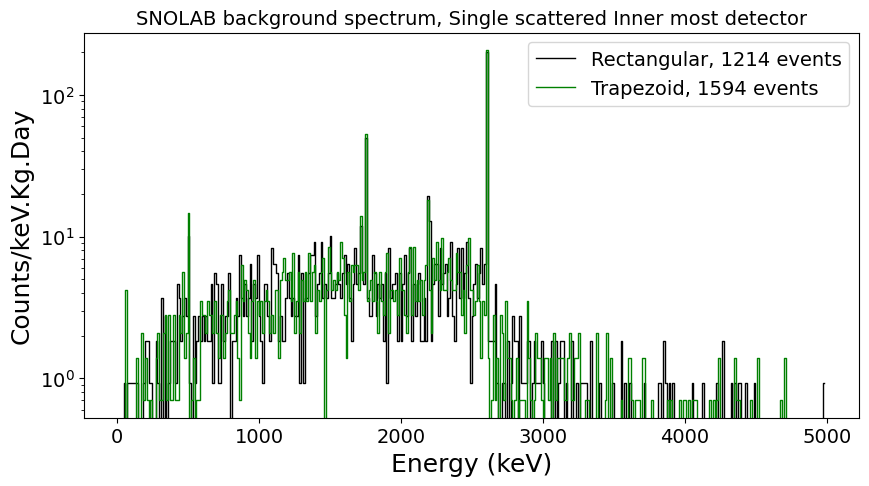

In [181]:
# plt.step(bins[:-1], n_rct_1SS_dru, 'k',where="mid",linewidth=1,label="Rectangular, %d events"%len(SS_Innermost_old))
plt.step(bins[:-1], n_trp_1SS_dru, 'g',where="mid",linewidth=1,label="Trapezoid, %d events"%len(SS_Innermost))



plt.yscale("log")

plt.legend(fontsize =14)
#plt.xticks(np.arange(0, 11, 1))
label("Energy (keV)", "Counts/keV.Kg.Day", 10, 5)
plt.title("SNOLAB background spectrum, Single scattered Inner most detector", fontsize = 14)
plt.savefig("Figure/Energy_CsI_snolabbkg_innermost_comparison.jpg")

In [182]:
4.66/3.55

1.3126760563380282

In [183]:
1214*1.3

1578.2